# Assignment 3, Linear Regression.

---

What is linear regression?
Linear regression is that a number (or count) has a same multiple then before, so the hill (or slope) of the 'linear regression' on a graph is always a straight line.

For this, you need an equal counter on the X and Y axis.

For example;
$Y = 5x -7$, this means that Y = 5 multiple by X minus 7. With this Y is *always* equal to X.

## Start the assignment, with importing everything we need.

---

We start the assignment with everything we need.

We need:
Seaborn,
Pandas.
Matplotlib
SKlearn > R2, mean squared error and linear regression model.

After this, load in the Dataframe with panda's and look whats in the dataframe with DF.HEAD

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

import sklearn as sk #this is the most popular library for statistics and machine learning
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

df = pd.read_csv('data_Mashable.csv')
df.head()

#Shares LOG has been made smaller for easily handling the data

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


### now make a subset of the dataframe

---

For now, let's call the subset "subset". Just easy naming, also we use the URL later, so we can see what article has been shared the most by the shareslog.

In [2]:
df_subset = df[['url','shares_log','data_channel_is_world','title_sentiment_polarity','global_sentiment_polarity','title_subjectivity','global_subjectivity','is_weekend']]
df_subset.head()

,url,shares_log,data_channel_is_world,title_sentiment_polarity,global_sentiment_polarity,title_subjectivity,global_subjectivity,is_weekend
0,http://mashable.com/2013/10/29/ashton-kutcher-...,3.322219,0,0.375,0.082486,0.666667,0.439379,0
1,http://mashable.com/2014/09/08/mashies-sept-19...,2.437751,1,0.000,0.027715,0.000000,0.300454,0
2,http://mashable.com/2013/02/01/hello-kitty-roc...,3.176091,0,0.000,0.259120,0.000000,0.575486,0
3,http://mashable.com/2014/02/06/add-us-on-snapc...,3.301030,0,0.000,0.134424,0.000000,0.327220,0
4,http://mashable.com/2014/01/07/lindsey-vonn-wi...,3.778151,0,0.000,0.109256,0.000000,0.507709,0


After this, make a pairplot to see what the relation is to each variable.

<function matplotlib.pyplot.show(*args, **kw)>

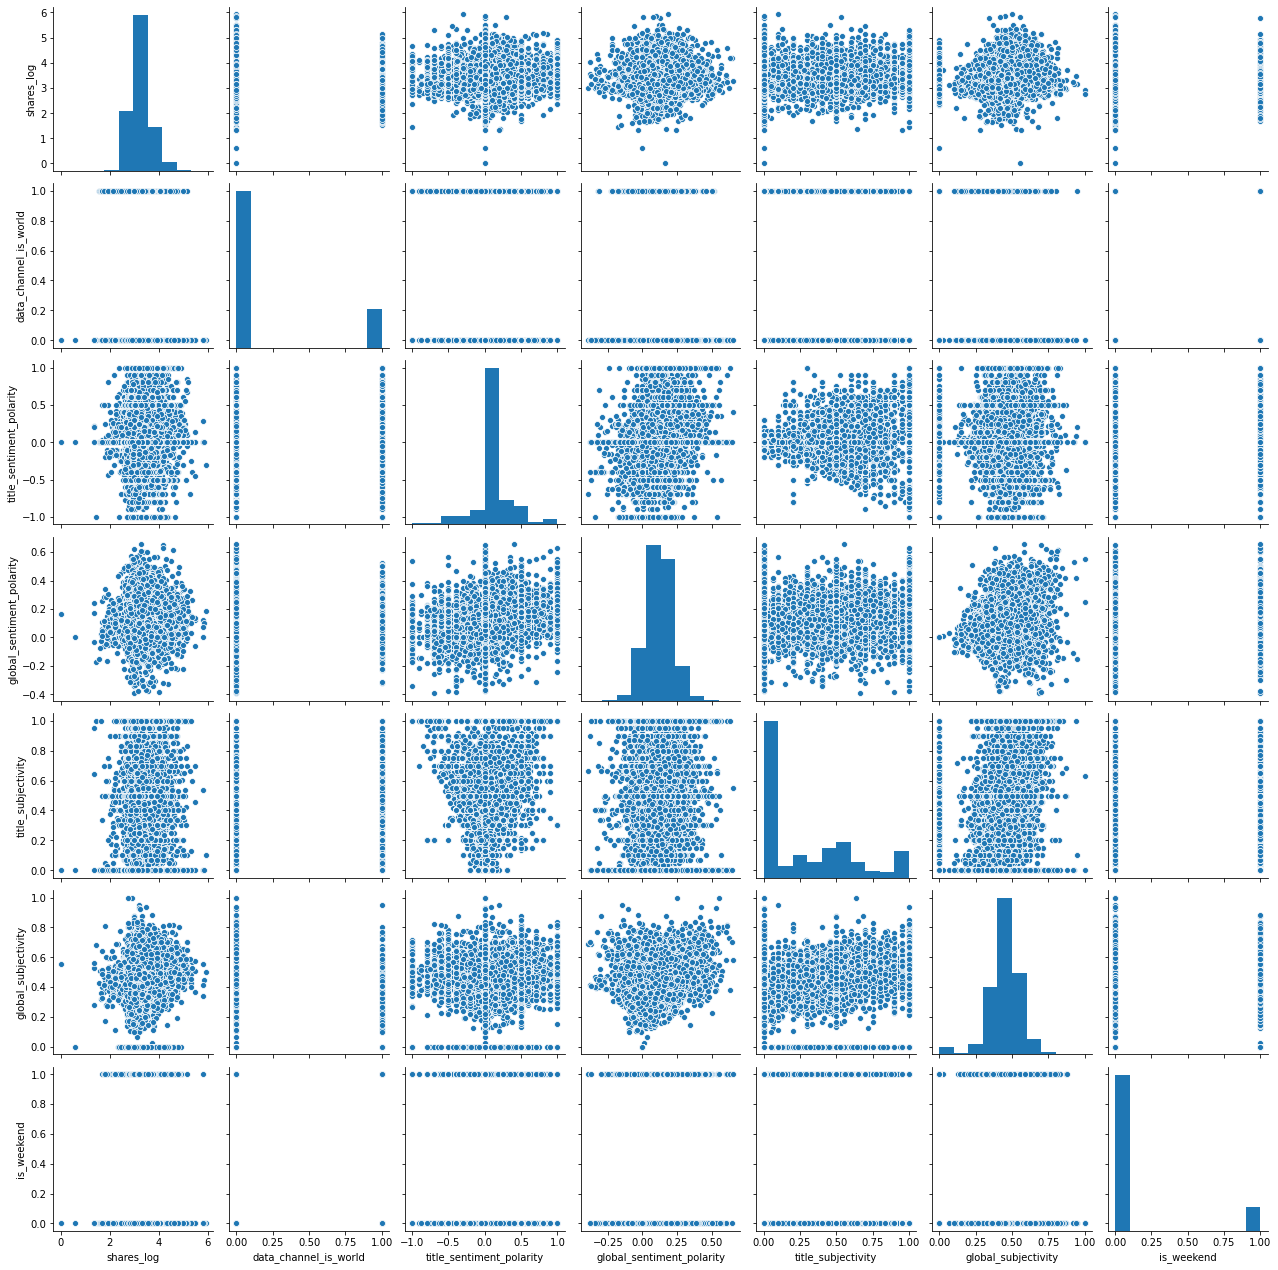

In [3]:
sns.pairplot(df_subset)
plt.show

With this pairplot, we can see that the data has some outliers, especially at 0. For now I will leave them bee, because i don't see much issue with keeping them here. For future projects it will be needed to clean the data a little bit more.

After we have done this, let's see what the correlations are by making a correlation table

In [4]:
df_subset.corr().sort_values(by = "shares_log")

,shares_log,data_channel_is_world,title_sentiment_polarity,global_sentiment_polarity,title_subjectivity,global_subjectivity,is_weekend
data_channel_is_world,-0.141932,1.000000,-0.073449,-0.214410,-0.062078,-0.198923,-0.006276
title_sentiment_polarity,0.050216,-0.073449,1.000000,0.238290,0.238629,0.033078,0.034256
global_sentiment_polarity,0.053199,-0.214410,0.238290,1.000000,0.026624,0.315314,0.023717
title_subjectivity,0.055161,-0.062078,0.238629,0.026624,1.000000,0.125244,0.021418
global_subjectivity,0.093021,-0.198923,0.033078,0.315314,0.125244,1.000000,0.014754
is_weekend,0.105919,-0.006276,0.034256,0.023717,0.021418,0.014754,1.000000
shares_log,1.000000,-0.141932,0.050216,0.053199,0.055161,0.093021,0.105919


What we can see from this table is that the "Is_weekend" variable and "global_subjectivity" has the strongest relation to 'shares_log'.

Also, 'title_sentiment_polarity' has one of the weakest relations to 'shares_log'.

---

## Training the data

---

For now we want to split the data and train our model and test it.


In [5]:
y = df_subset["shares_log"]
y.index = df_subset["url"]
X = df_subset.loc[:,"data_channel_is_world":"is_weekend"]
X.index = df_subset["url"]
X.head()

,data_channel_is_world,title_sentiment_polarity,global_sentiment_polarity,title_subjectivity,global_subjectivity,is_weekend
url,,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0.375,0.082486,0.666667,0.439379,0
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,1,0.000,0.027715,0.000000,0.300454,0
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0.000,0.259120,0.000000,0.575486,0
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0.000,0.134424,0.000000,0.327220,0
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0.000,0.109256,0.000000,0.507709,0


What we want to do is to split the data set into 70% - 30%. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.head()

,data_channel_is_world,title_sentiment_polarity,global_sentiment_polarity,title_subjectivity,global_subjectivity,is_weekend
url,,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,0,0.136364,0.230736,0.500000,0.451711,1
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,0.100000,0.078816,0.100000,0.476976,0
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,0.000000,0.263511,0.000000,0.488495,0
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,0.136364,0.052758,0.454545,0.545746,0
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,0.000000,0.063513,0.750000,0.507042,0


After we have split the data, we can create the linear regression instance and try to identify two things.

* Coefficient model
* Residual model

In [9]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [10]:
coef = pd.DataFrame(X.columns, lm.coef_)
coef

,0
-0.132199,data_channel_is_world
0.047131,title_sentiment_polarity
-0.003526,global_sentiment_polarity
0.027616,title_subjectivity
0.216870,global_subjectivity
0.130409,is_weekend


With the coefficient in our pocket, we can look up the intercept of the dataframe.

In [11]:
b0 = lm.intercept_
b0

3.1549942608752937

With the intercept in place, we can come up with the following analysis:

* Intercept is 3.15
* Data channel is world adds 0.13 to the log shares
* Title subjectivity add 0.02 to the log shares
* Global subjectivity adds 0.21 to the log shares
* Weekend days add 0.13 to the log shares
* Title sentiment adds 0.047 to the log shares

We can assume our Linear Regression Equation of $y = b0 + b1x1 + b2x2... bnxn + e$. Where e is the residual would be as followed

* Log shares = 3.15 + 0.13 Data channel is world . 0.047 title_sentiment_polarity + 0.003 global sentiment polarity . 0.02 title subjectivity + 0.21 glolal subjectivity . 0.130 is_weekend

In [14]:
y_test_p = lm.predict(X_test)
e = y_test - y_test_p
e.head()

url
http://mashable.com/2013/04/06/creepy-petman-robot/                    0.155465
http://mashable.com/2014/07/08/nash-grier-vine-slur/                  -0.184451
http://mashable.com/2014/06/06/wwdc-2014-rise-of-the-kits/            -0.119838
http://mashable.com/2014/04/30/mario-kart-8-free-wii-u-game/           0.352101
http://mashable.com/2014/05/28/leaked-emails-evan-spiegel-snapchat/    0.552433
Name: shares_log, dtype: float64

For now, calculate the $R2$

In [15]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.035222277065421026

We ended up with a $R^2$ value of 0.0352 which means 3.52% of the variation in log shares can be explained by the model. Which is not that good.

Now we calculate our Rooted Mean Squarred Deviation (RMSD)

In [16]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3988168027346345

he RSME Predicts that we are 0.39 off in our predictions of $log$ shares

The below method did not represent in our opinion the linear regression properly. so we recombined X_test and y_test into a single dataframe to create the model

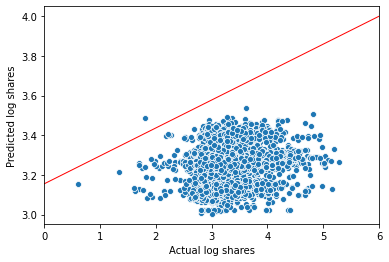

In [18]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
#plt.ylim([3,4])
plt.plot([0,6], [b0, 4], color='red', lw=1) #Plot a diagonal length
plt.show()

In [20]:
# df_test is the data frame where we tested our model
df_test = pd.merge(X_test, y_test0)
df_test["shares_log_p"] = lm.predict(X_test)
df_test["residuals"] = df_test["shares_log"] - df_test["shares_log_p"]
df_test.head()

,data_channel_is_world,title_sentiment_polarity,global_sentiment_polarity,title_subjectivity,global_subjectivity,is_weekend,shares_log,shares_log_p,residuals
url,,,,,,,,,
http://mashable.com/2013/04/06/creepy-petman-robot/,0,-0.300000,0.038955,0.70000,0.508973,1,3.556303,3.400838,0.155465
http://mashable.com/2014/07/08/nash-grier-vine-slur/,0,0.333333,0.001587,0.75000,0.493311,0,3.113943,3.298395,-0.184451
http://mashable.com/2014/06/06/wwdc-2014-rise-of-the-kits/,0,0.156566,0.068890,0.49596,0.425864,1,3.278754,3.398592,-0.119838
http://mashable.com/2014/04/30/mario-kart-8-free-wii-u-game/,0,0.000000,-0.004876,0.00000,0.535515,0,3.623249,3.271148,0.352101
http://mashable.com/2014/05/28/leaked-emails-evan-spiegel-snapchat/,0,0.195455,0.194092,0.29596,0.528989,0,3.838849,3.286416,0.552433


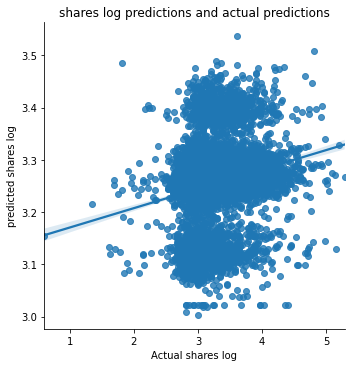

In [21]:
sns.lmplot(x='shares_log', y='shares_log_p', fit_reg=True, data=df_test)
plt.title("shares log predictions VS actual predictions")
plt.xlabel("Actual shares log")
plt.ylabel("predicted shares log")
plt.show()

What we can see is that the modal that i'm using is mostly way off with an higher estimate or a very low estimaty.

Funny enough, my prediction that I made hasn't got one right at all, so that pretty odd to say the least.

It could mean that certain topics have a higher chance of going viral than other topics, suchs as political news, cat video's or scientific discoverys could have an higher chance of going viral than say; technical business. Still this is an assumption, so I would have dive deeper into this data set and this assignment to see what kind of article has the highest chance to go viral.

Now let's plot the resiudals in comparison to our actual shares log

## Residuals

---


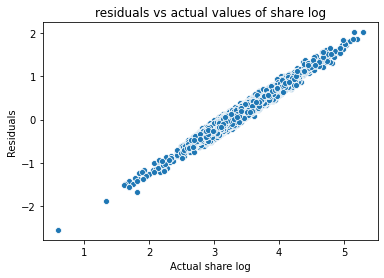

In [22]:
sns.scatterplot(y_test, e)
plt.xlabel('Actual share log')
plt.ylabel('Residuals')
plt.title("residuals and actual values of share log")
plt.show()

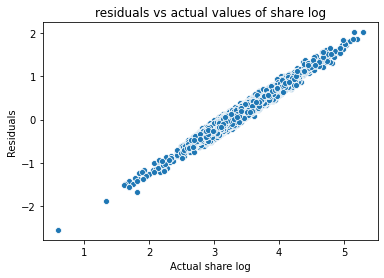

In [23]:

sns.scatterplot(data = df_test, x = "shares_log", y = "residuals")
plt.xlabel('Actual share log')
plt.ylabel('Residuals')
plt.title("residuals vs actual values of share log")
plt.show()

What we can see is that both residuals almost have the same neat line, which could mean that the residuals are pretty on par.

It's weird that even with an R with an value of 0.0352 that there isn't a prediction right, or on par with the linear regression.